In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline

/Users/patrickrhbrown/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**1)** Load the data into a dataframe from `data/balance.csv`. Make a scatter matrix of the variables. Comment on the distribution of your variables and describe the relationships between your numeric feature variables and Balance.

In [3]:
balance = pd.read_csv('data/balance.csv', index_col=0)
balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


/Users/giovanna/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


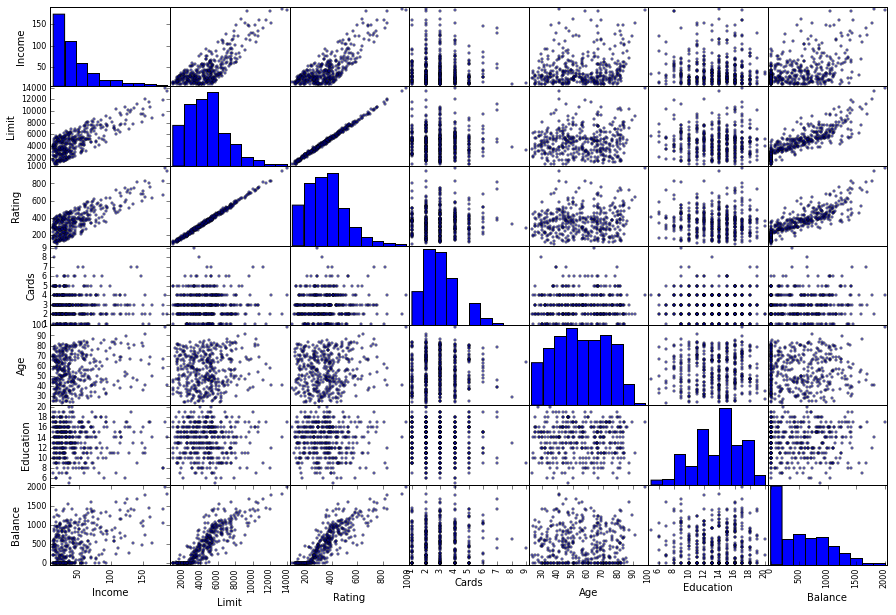

In [3]:
pd.scatter_matrix(balance, figsize=(15, 10))
plt.show()

In [4]:
# Balance is strongly correlated to the Rating and Limit and somewhat related to Income.

**2)** Since Gender, Student and Married are boolean variables, convert the columns to 1/0, i.e. the value should be 1 if the response to Married is Yes, otherwise 0.

**3)** Since Ethnicity is a categorical variable that has more than 2 categories, we need to convert the categories within the variable to separate columns with binary responses. These are known as dummy variables. Use get_dummies in pandas to get create dummy variables for Ethnicity. After you create the model, drop the African dummy variable. It can be any dummy variable you want the rest of the dummies to be compared against.

**4)** Using all the feature variables, fit a linear regression model to predict Balance. 


**5)** Plot the histogram for Balance. What do you observe?

You should find that various Balance values are fitted around the 0 point. It would seem that the abundance of obseravtions at 0 balance is affecting how the model is fitted. Plot the histogram for Balance again, except set bins=100. What do you observe?

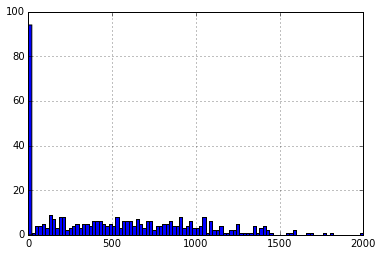

In [10]:
# Plotting the histogram for the Balance (y)
y.hist(bins=100)
plt.show()

**6)** Re-plot the univariate scatter plot on a bigger figure size. Look for variable(s) that can differentiate most zero balance observation from non-zero balance observations. Use the provided pandas code as a reference.

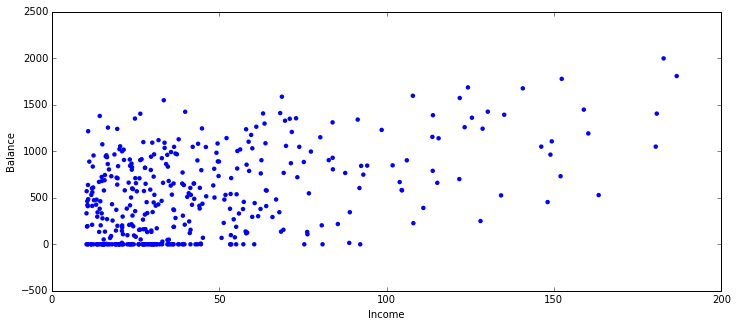

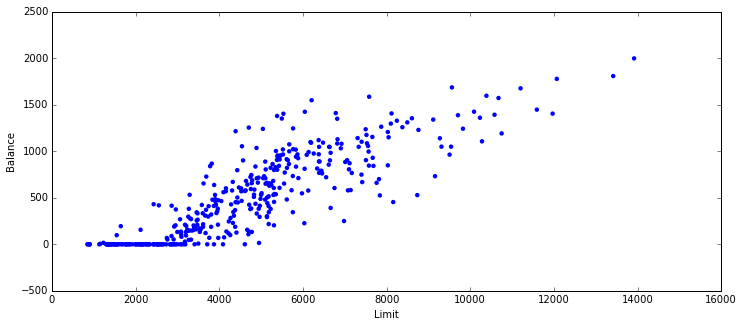

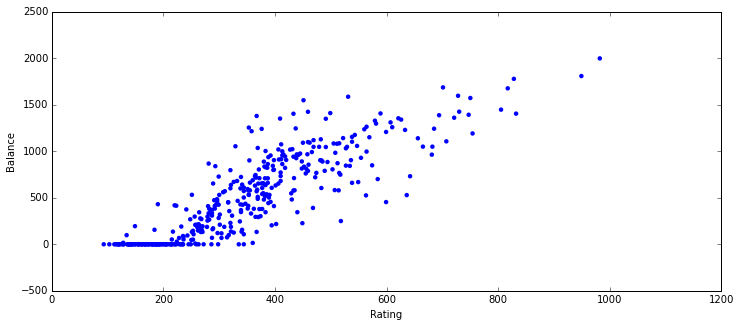

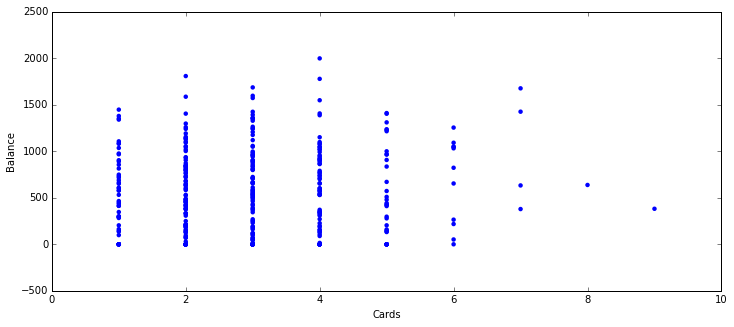

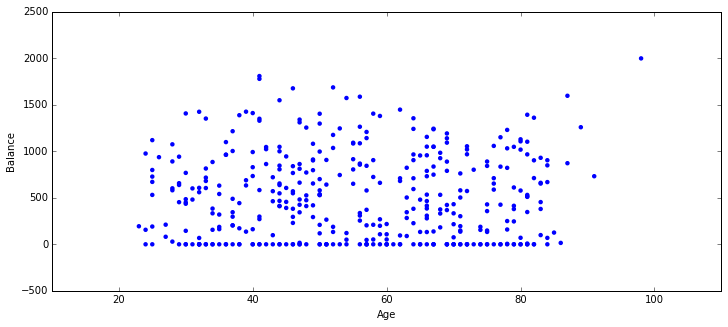

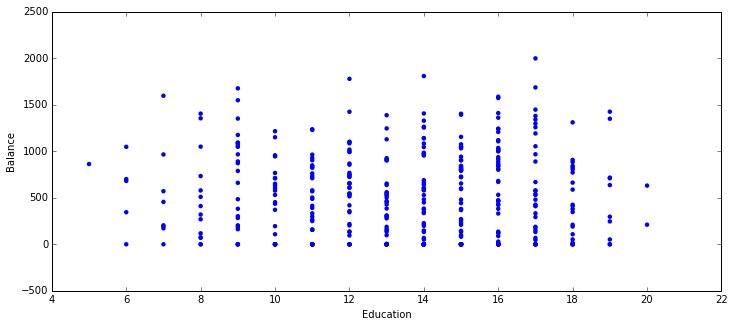

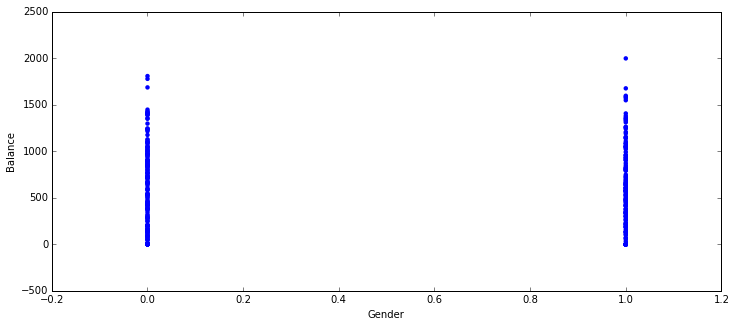

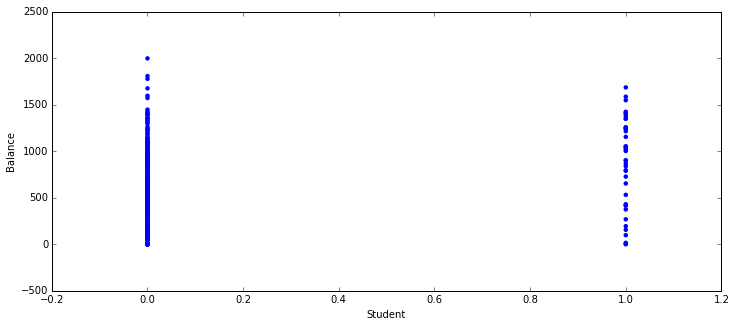

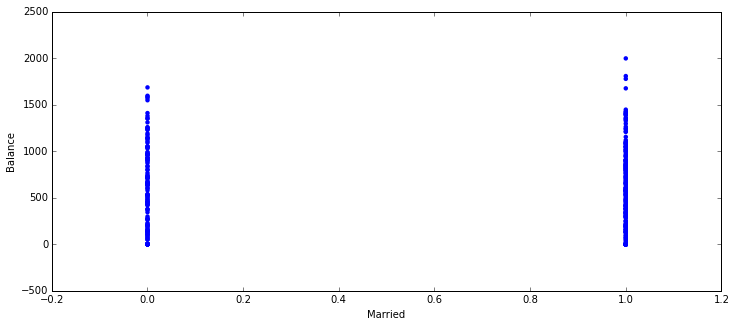

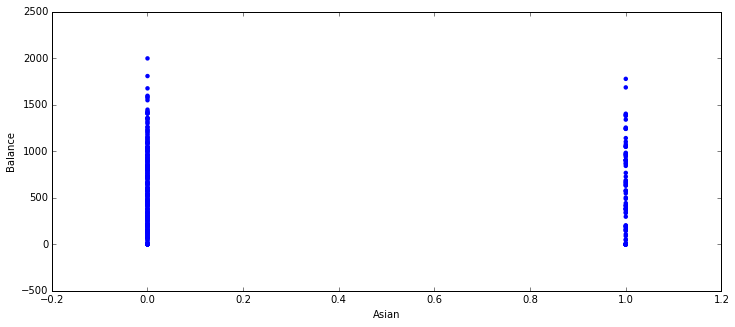

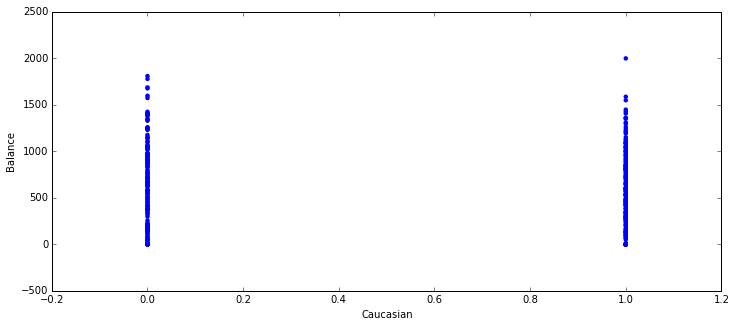

In [11]:
for col in all_columns:
    balance.plot(kind='scatter', y='Balance', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('Balance')
    plt.show()

**7)** Once you find the relevant variable(s), decide on a threshold that would give you reasonable separation between the zero and non-zero obseravations, i.e. minimize false positive and false negative predictions. You can do it visually based on your plot now, but a slightly more sophisticated way to model this would be with a
Decision Tree which we will cover later in the course.

**8)** Remove the data points below the decided threshold of your chosen variable and examine the number of zero obseravations that remain.

This is an atypical first step for linear regression but works well in this situation because we have a large loading of 0 observations in our response, which are affecting the regression fit. In essence, we are fitting two models, one feeding into the other. The first model simply predicts 0 or non-zero balance based on a single feature, the second model predicts the balance given that the first model predicted non-zero balance.

**9)** Now re-fit the same model and examine the residuals. It might still be skewed, but should resemble more of a normal distribution. While it's important to strive for models that pass the model diagnostic tests, in practice we sometimes loosen the restrictions a bit.

**10)** Try out a few different models using different sets of features. This can be a bit of an art, but some guidelines you can use are to (i) exclude features which don't have statistically significant beta coefficients and (ii) exclude features with high variance inflation factor or high collinearity with another feature already in the model.

To decide among the models, you can use adjusted R^2 or F-tests. Tomorrow we'll get into a more general model-evaluation technique called cross-validation.

## Extra Credit

Interactions, Polynomials, Transformations, etc.

**1)** Fit a linear model to predict Balance using Income as a predictor. Fit a second model using Income and Student as predictors. Finally fit a model using Income, Student, and IncomexStudent to account for a possible interaction effect between Income and Student. How do the models compare? Is the interaction term significant?
If the interaction term is significant, make a single plot with two regression lines, one for Student and one for non-Students. You should have Balance on the y-axis, Income on the x-axis, and Student or non-Student coded in using two different colors (add a legend).
Since the models are nested such that each model has one more predictor than the previous, you can simply look at the p-values to make some comparisons. This is in essence a t-test, which is equivalent to performing an F-test.


In [16]:
X_new_sub = new_balance['Income']
summary = summary_model(X_new_sub, y_new, label='Income')
print summary

X_new_sub = new_balance[['Income', 'Student']]
summary = summary_model(X_new_sub, y_new, 'Income/Student')
print summary


new_balance.loc[:, 'Income*Student'] = new_balance['Income'] * new_balance['Student']
X_new_sub = new_balance[['Income', 'Student', 'Income*Student']]
summary = summary_model(X_new_sub, y_new, 'Income/Student Interaction')
print summary

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     43.55
Date:                Fri, 06 Jan 2017   Prob (F-statistic):           1.85e-10
Time:                        14:35:07   Log-Likelihood:                -2246.1
No. Observations:                 304   AIC:                             4496.
Df Residuals:                     302   BIC:                             4504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        470.2326     38.301     12.277      0.0

/Users/giovanna/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/giovanna/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


When we added Student to Income, the model's accuracy in terms of Adjusted R^2 went up. The interaction (Income * Student) is also significant, and our model's accuracy in terms of Adjusted R^2 also increases.

**2)** Return to your final model in 10. Can you improve upon this fit by making transformations to your selected features?
Generally, there is no defined end to the modeling process so this step can take as long as you would like. At some point you just have to stop!
